In [27]:
from fastai.vision.all import *
from fastbook import *
from fastdownload import download_url
from fastcore.all import *

In [8]:
fish= search_images_ddg("fish",max_images=20)

In [12]:
download_url(fish[0],dest='fish1.jpg')

Path('fish1.jpg')

In [15]:
im=Image.open('fish1.jpg')

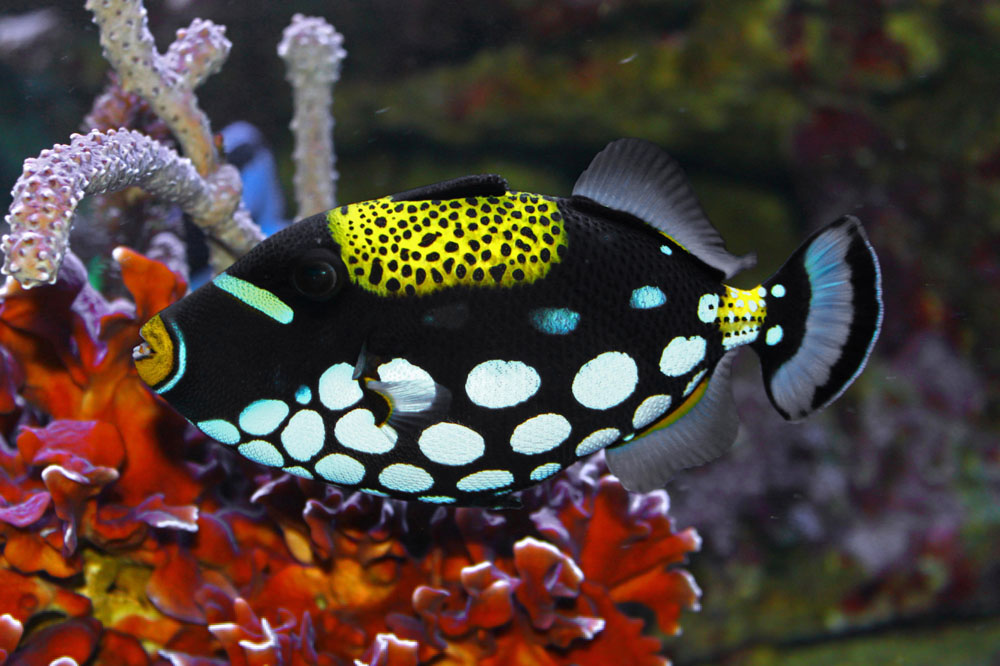

In [16]:
im

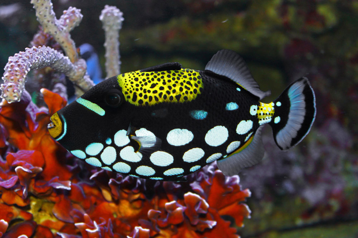

In [20]:
im.to_thumb(358,358)

In [21]:
fish_types= 'steelhead','walleye','swordfish'

In [36]:
path=Path('fishes')
if not path.exists():
    path.mkdir()
    for i in fish_types:
        dest=(path/i)
        dest.mkdir()
        results= search_images_ddg(f'{i} catch')
        download_images(dest,urls=results)

In [37]:
failed= verify_images(get_image_files(path))

In [38]:
failed.map(Path.unlink)

(#11) [None,None,None,None,None,None,None,None,None,None...]

In [49]:
fishy= DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42, valid_pct=0.2),
    get_y=parent_label,
    item_tfms=[Resize(256)]
)

In [50]:
dls=fishy.dataloaders(path)

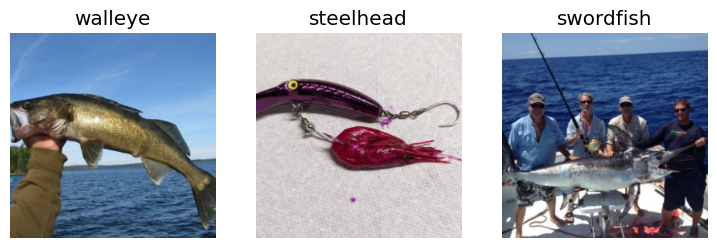

In [54]:
dls.show_batch(max_n=3)

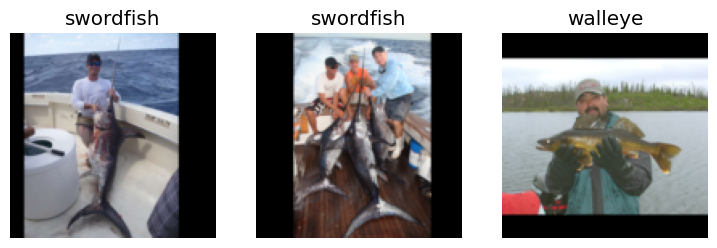

In [57]:
fishy=fishy.new(item_tfms=Resize(128, ResizeMethod.Pad,pad_mode='zeros'))
dls=fishy.dataloaders(path)
dls.show_batch(max_n=3)